In [1]:
import pandas as pd

### Load data
df = pd.read_csv('train_dataset.csv', encoding='ISO-8859-1', low_memory=False)
df = df.dropna()

y = df["type"]
X = df.drop(columns=["type"])
X = X.drop(columns=["label"])

In [2]:
err_arr = X.loc[X["src_bytes"] == "0.0.0.0"]

## Rimuovere righe in cui "src_bytes" è "0.0.0.0"
X = X.drop(index=err_arr.index)
y = y.drop(index=err_arr.index)

X["src_bytes"] = pd.to_numeric(X["src_bytes"], errors='coerce')

X.astype({'src_bytes': 'int64', 'ts': 'datetime64[ms]', 'dns_AA': 'bool', 'dns_RD': 'bool', 'dns_RA': 'bool', 'dns_rejected': 'bool', 'ssl_resumed': 'bool', 'ssl_established': 'bool', 'weird_notice': 'bool'}).dtypes

ts                        datetime64[ms]
src_ip                            object
src_port                           int64
dst_ip                            object
dst_port                           int64
proto                             object
service                           object
duration                         float64
src_bytes                          int64
dst_bytes                          int64
conn_state                        object
missed_bytes                       int64
src_pkts                           int64
src_ip_bytes                       int64
dst_pkts                           int64
dst_ip_bytes                       int64
dns_query                         object
dns_qclass                         int64
dns_qtype                          int64
dns_rcode                          int64
dns_AA                              bool
dns_RD                              bool
dns_RA                              bool
dns_rejected                        bool
ssl_version     

In [3]:
## Encoding
import numpy as np
from sklearn import preprocessing

labels = X.columns

for lab in labels:
    toenc = X[lab]

    toenc = np.array(toenc).reshape(-1, 1)

    le = preprocessing.OrdinalEncoder()
    le.fit(toenc)
    toenc = le.transform(toenc)
    X[lab] = toenc

le = preprocessing.LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

In [4]:
## Split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit

## Simple
X_train, X_val, y_train, y_val = train_test_split(X, y_enc, stratify=y_enc, test_size=0.8, random_state=42)

# ## Split copilot
# test_fold = [-1 if i < 493586 else 0 for i in range(len(X))]
# ps = PredefinedSplit(test_fold)

# train_idx, val_idx = next(ps.split())
# X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
# y_train, y_val = y_enc[train_idx], y_enc[val_idx]

# ## Split prof
# indices = np.arange(X.shape[0])
# train_idx, val_idx = train_test_split(indices, test_size=0.2, stratify=y, random_state=42)

# fold = np.zeros(X.shape[0])
# fold[train_idx] = -1

# ps = PredefinedSplit(fold)
# ps.get_n_splits()

# for i, (train_index, test_index) in enumerate(ps.split()):
#     print(f"Fold {i}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")

# X_val = X[val_idx,:]
# y_val = y[val_idx]
# X_train = X[train_idx,:]
# y_train = y[train_idx]

In [5]:
## Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

In [6]:
# ## Normalization
# normalizer = preprocessing.Normalizer()
# normalizer.fit(X_train)
# X_train_norm = normalizer.transform(X_train)
# X_val_norm = normalizer.transform(X_val)

In [7]:
# ## Scaling + Normalization
# normalizer_std = preprocessing.Normalizer()
# normalizer_std.fit(X_train_std)
# X_train_std_norm = normalizer.transform(X_train_std)
# X_val_std_norm = normalizer.transform(X_val_std)

In [8]:
# ## Normalization + Scaling
# scaler = preprocessing.StandardScaler()
# scaler.fit(X_train_norm)
# X_train_norm_std = scaler.transform(X_train_norm)
# X_val_norm_std = scaler.transform(X_val_norm)

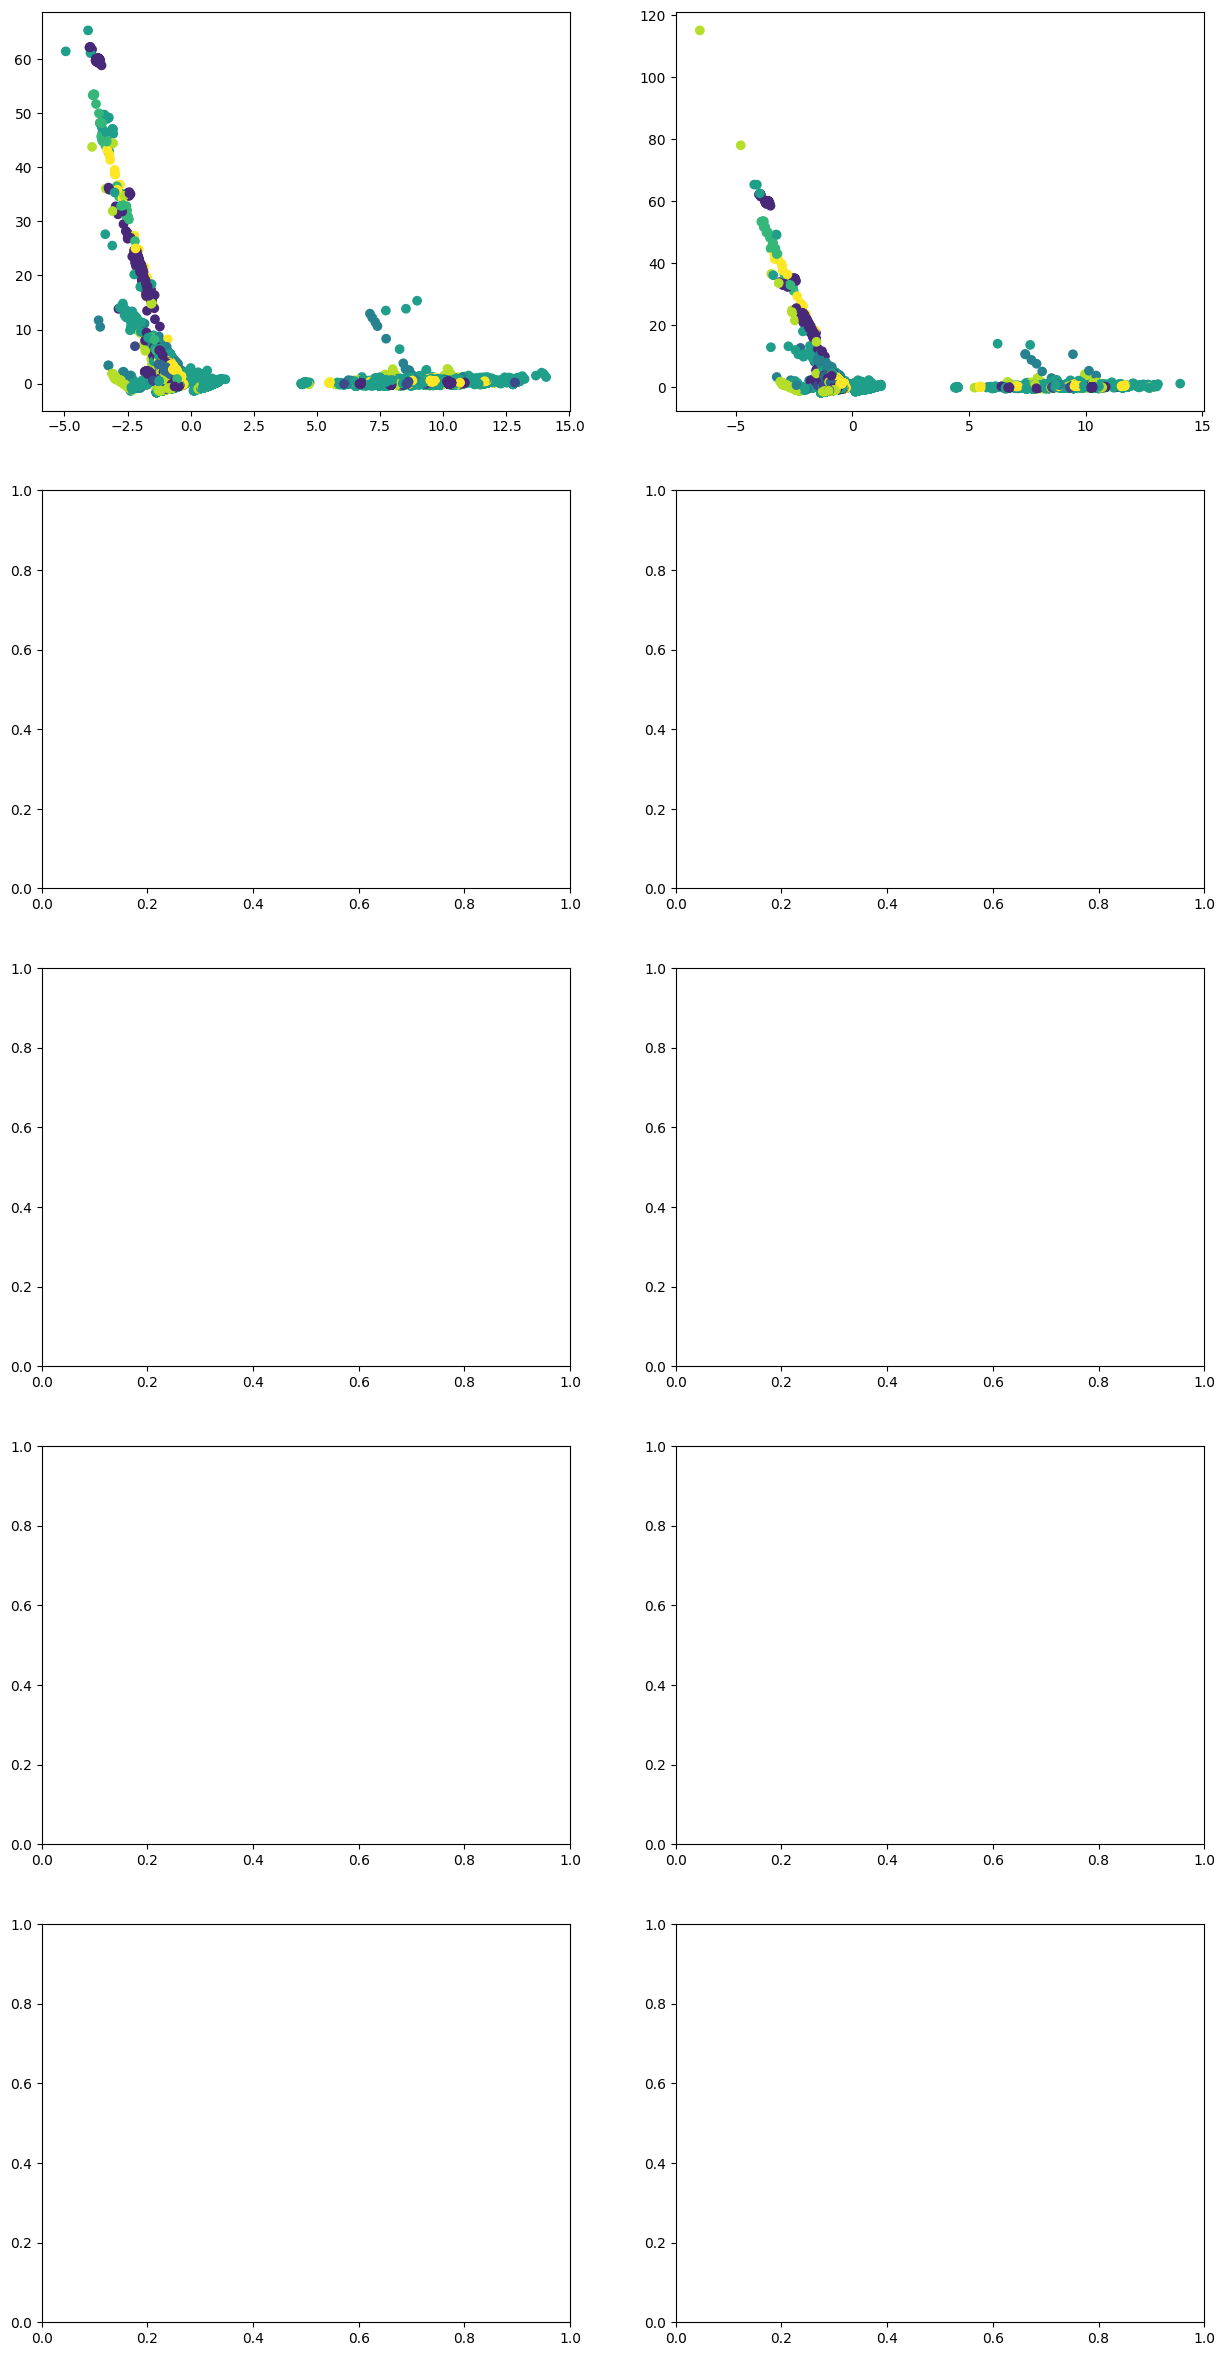

In [9]:
## PCA
from sklearn import decomposition

# Scaling
pca = decomposition.PCA()
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_val_pca = pca.transform(X_val_std)

# # Normalization
# pca_norm = decomposition.PCA()
# pca_norm.fit(X_train_norm)
# X_train_pca_norm = pca.transform(X_train_norm)
# X_val_pca_norm = pca.transform(X_val_norm)

# # Scaling + Normalization
# pca_std_norm = decomposition.PCA()
# pca_std_norm.fit(X_train_std_norm)
# X_train_pca_std_norm = pca.transform(X_train_std_norm)
# X_val_pca_std_norm = pca.transform(X_val_std_norm)

# # Normalization + Scaling
# pca_norm_std = decomposition.PCA()
# pca_norm_std.fit(X_train_norm_std)
# X_train_pca_norm_std = pca.transform(X_train_norm_std)
# X_val_pca_norm_std = pca.transform(X_val_norm_std)

# # Nothing
# pca_uns = decomposition.PCA()
# pca_uns.fit(X_train)
# X_train_uns = pca.transform(X_train)
# X_val_uns = pca.transform(X_val)


import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 2, figsize=(15, 30))

axs[0,0].scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
axs[0,1].scatter(X_val_pca[:,0], X_val_pca[:,1], c=y_val)

# axs[1,0].scatter(X_train_uns[:,0], X_train_uns[:,1], c=y_train)
# axs[1,1].scatter(X_val_uns[:,0], X_val_uns[:,1], c=y_val)

# axs[2,0].scatter(X_train_pca_norm[:,0], X_train_pca_norm[:,1], c=y_train)
# axs[2,1].scatter(X_val_pca_norm[:,0], X_val_pca_norm[:,1], c=y_val)

# axs[3,0].scatter(X_train_pca_norm_std[:,0], X_train_pca_norm_std[:,1], c=y_train)
# axs[3,1].scatter(X_val_pca_norm_std[:,0], X_val_pca_norm_std[:,1], c=y_val)

# axs[4,0].scatter(X_train_pca_std_norm[:,0], X_train_pca_std_norm[:,1], c=y_train)
# axs[4,1].scatter(X_val_pca_std_norm[:,0], X_val_pca_std_norm[:,1], c=y_val)
plt.show()

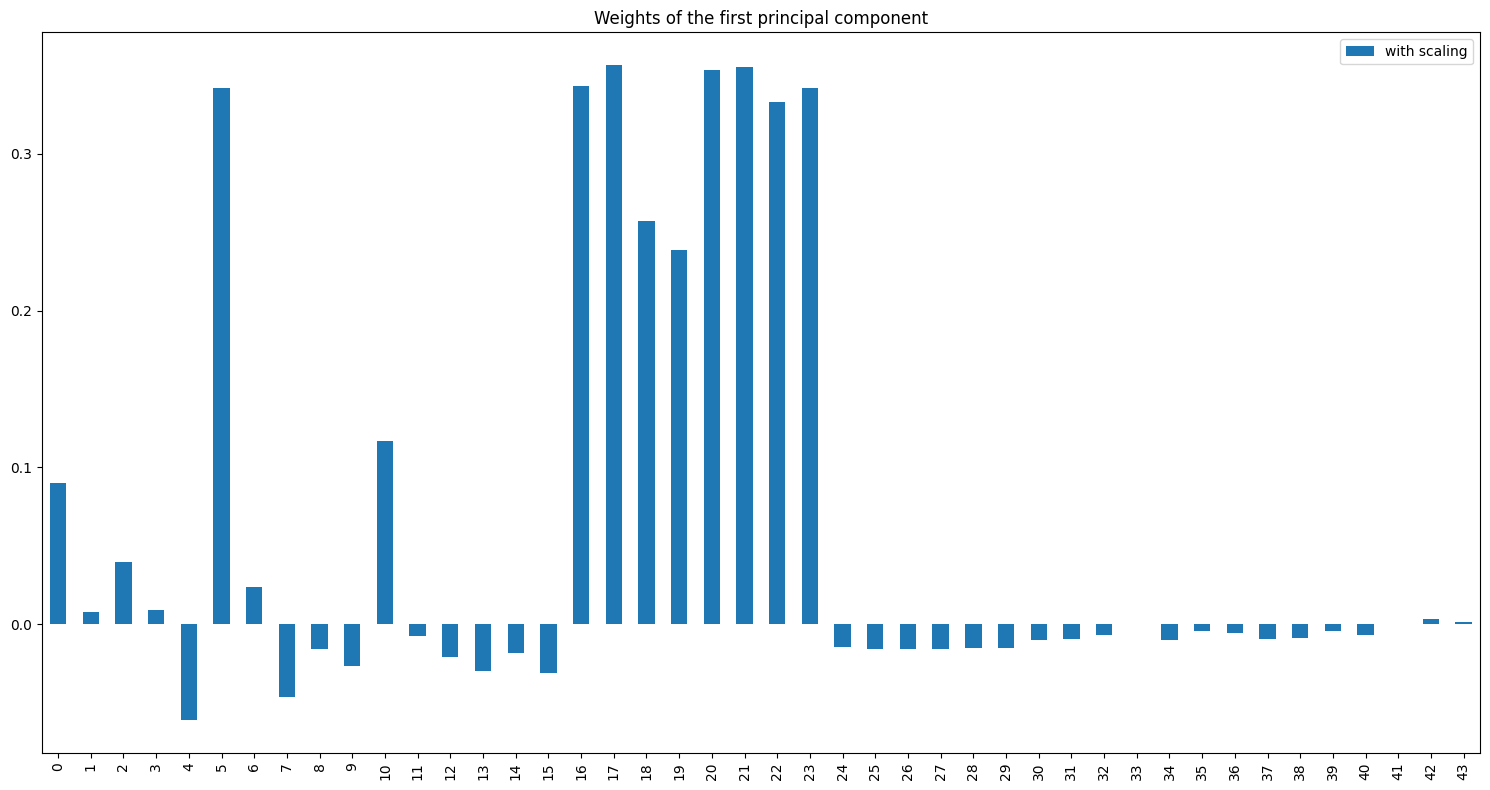

In [10]:
first_pca_component = pd.DataFrame(
    # pca_uns.components_[0], index=X_train.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = pca.components_[0]
# first_pca_component["with normalization"] = pca_norm.components_[0]
# first_pca_component["with scaling + normalization"] = pca_std_norm.components_[0]
# first_pca_component["with normalization + scaling"] = pca_norm_std.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(15, 8)
)
_ = plt.tight_layout()

In [11]:
# ## LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# lda = LinearDiscriminantAnalysis(n_components=9)
# lda.fit(X_train_std, y_train)
# X_train_lda = lda.transform(X_train_std)
# X_val_lda = lda.transform(X_val_std)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score

### KNN
best_score = 0
best_k = -1
best_clf = None

for k in np.arange(1,10,2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    score_acc = accuracy_score(y_val, y_pred)
    score_recall = recall_score(y_val, y_pred, average='weighted')
    score_precision = precision_score(y_val, y_pred, average='weighted')
    score_f1 = f1_score(y_val, y_pred, average='weighted')

    score = clf.score(X_val, y_val)

    print("K={:d}".format(k))
    print("  Accuracy - {:.4f}".format(score_acc))
    print("  Precision - {:.4f}".format(score_precision))
    print("  Recall - {:.4f}".format(score_recall))
    print("  F1 - {:.4f}".format(score_f1))

    if best_score < score:
        best_score = score
        best_k = k
        best_clf = clf
print("\nBest K = {:d} with score = {:.4f}".format(best_k, best_score))

# cm = confusion_matrix(y_val, best_clf.predict(X_val), labels=best_clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
# disp.plot()

K=1
  Accuracy - 0.9925
  Precision - 0.9924
  Recall - 0.9925
  F1 - 0.9924
K=3
  Accuracy - 0.9918
  Precision - 0.9916
  Recall - 0.9918
  F1 - 0.9916
K=5
  Accuracy - 0.9910
  Precision - 0.9908
  Recall - 0.9910
  F1 - 0.9908
K=7
  Accuracy - 0.9903
  Precision - 0.9901
  Recall - 0.9903
  F1 - 0.9900
K=9
  Accuracy - 0.9897
  Precision - 0.9895
  Recall - 0.9897
  F1 - 0.9894

Best K = 1 with score = 0.9925


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt

#computer roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
#the classes get them from rf
n_classes = best_clf.classes_
y_val = label_binarize(y_val, classes=n_classes)
y_pred_proba = best_clf.predict_proba(X_val)

for i in range(len(n_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plot roc curve
fig, ax = plt.subplots()

for i in range(len(n_classes)):

    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %d' % (roc_auc[i], i))

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")
plt.show()

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# clf = KNeighborsClassifier(n_neighbors=)
# clf.fit(X_train_lda, y_train)

# cm = confusion_matrix(y_val, clf.predict(X_val_lda), labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# disp.plot()